In [1]:
# Enconding: ISO-8859-1
# rm(list = ls())

# Este um script para plotar ordenações (biplots ou triplots) usando os pacotes
# ggplot2, ggrepel e grid. O objeto da ordenação será gerado pelo pacote vegan.
# O script funcionará tanto para CCAs quanto para RDAs.
#
# O Gavin Simpson, um dos desenvolvedores do vegan, está trabalhando em um pacote
# exclusivo para as ordenações: https://github.com/gavinsimpson/ggvegan

# Este script teve como base a seguinte página: http://renatabrandt.github.io/EBC2015/PCA.html

# Problemas com a transparência do ggplot2 no jupyter notebook

install.packages("packfor", repos = "http://R-Forge.R-project.org")

ipak <- function(pkg){
    new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
    if (length(new.pkg))
        install.packages(new.pkg, dependencies = TRUE)
    sapply(pkg, require, character.only = TRUE)
}
ipak(packages <- c("vegan", "ggplot2", "ggrepel", "grid", "packfor"))

Installing package into ‘/home/kguidonimartins/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
Warning message:
“package ‘packfor’ is not available (for R version 3.3.1)”Loading required package: vegan
Loading required package: permute
Warning message:
“package ‘permute’ was built under R version 3.3.2”Loading required package: lattice
This is vegan 2.4-1
Loading required package: ggplot2
Loading required package: ggrepel
Loading required package: grid
Loading required package: packfor
packfor: R Package for Forward Selection (Canoco Manual p.49)
version0.0-8


vegan ggplot2 ggrepel    grid packfor 
   TRUE    TRUE    TRUE    TRUE    TRUE

Testing variable 1
Testing variable 2
Procedure stopped (adjR2thresh criteria) adjR2cum = 0.246740 with 2 variables (superior to 0.232172)


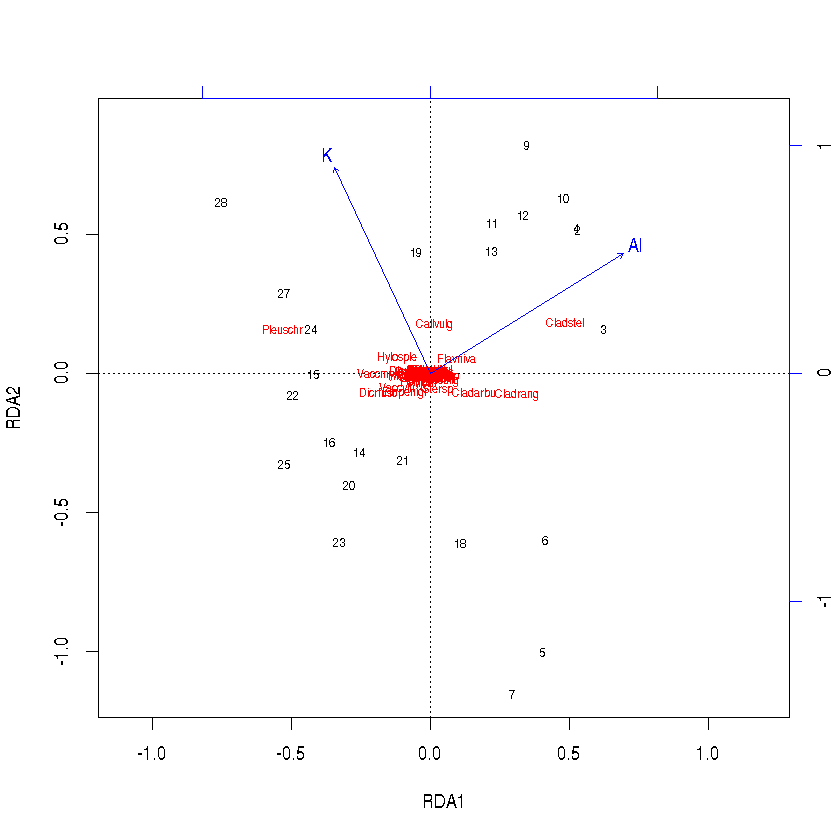

In [2]:
# dados de teste
data("varespec")
data("varechem")

# entrada
Y <- decostand(varespec, "hellinger")
X <- decostand(varechem, "standardize")

# rda com seleção
rda1 <- rda(Y ~ ., X) # modelo saturado
R2a.all <- RsquareAdj(rda1)$adj.r.squared
env.sel <- forward.sel(Y, X, adjR2thresh = R2a.all)
env.sign <-  sort(env.sel$order)
env.red <- X[, c(env.sign)]
rda2 <- rda(Y, env.red)

# Plot para uma rápida visualização
plot(rda2, type = "t")

In [3]:
# Atribua o objeto da ordenação a cca.results
# A partir daqui, o script seguirá um esqueleto baseado no objeto cca.results
cca.results <- rda2

# Definindo objetos-padrão para o plot
cca.summary <- summary(cca.results)
(imp.axis.1 <- cca.summary$cont$importance[2,1]) # explicação do eixo 1
(imp.axis.2 <- cca.summary$cont$importance[2,2]) # explicação do eixo 2
(rowScores <- as.data.frame(cca.results$CCA$u))  # scores das parcelas
(colScores <- as.data.frame(cca.results$CCA$v))  # scores das espécies 
(bi.var <- as.data.frame(cca.results$CCA$biplot)) # scores das variáveis ambientais

# Para salvar a figura em alta resolução.
# Sempre adeque a resolução à altura e à largura da figura.
# tiff(filename="figura.tiff", res=600, height=600/72*600, width=600/72*600, compression= "lzw")

[1] 0.2682

[1] 0.04404

,RDA1,RDA2
18,-0.12164706,-0.138454672
15,-0.09207393,-0.027437043
24,-0.08244642,0.118276432
27,-0.31866227,0.102483205
23,-0.21422732,-0.037220586
19,-0.07309611,-0.004037112
22,-0.20395125,-0.065071999
16,-0.06397259,-0.117585651
28,-0.35971648,0.176654911
13,0.03348894,0.550957391


,RDA1,RDA2
Callvulg,0.0213821439,0.487565100
Empenigr,-0.1028800932,-0.205699722
Rhodtome,-0.0673825328,-0.028007275
Vaccmyrt,-0.2057010800,-0.021884289
Vaccviti,-0.1369371380,-0.143735767
Pinusylv,-0.0054819703,0.015666269
Descflex,-0.0589698872,0.013558573
Betupube,-0.0058293172,-0.024154966
Vacculig,0.0413330534,-0.078209765
Diphcomp,0.0223808702,-0.044046188


,RDA1,RDA2
K,-0.4227100,0.9062650
Al,0.8494685,0.5276393


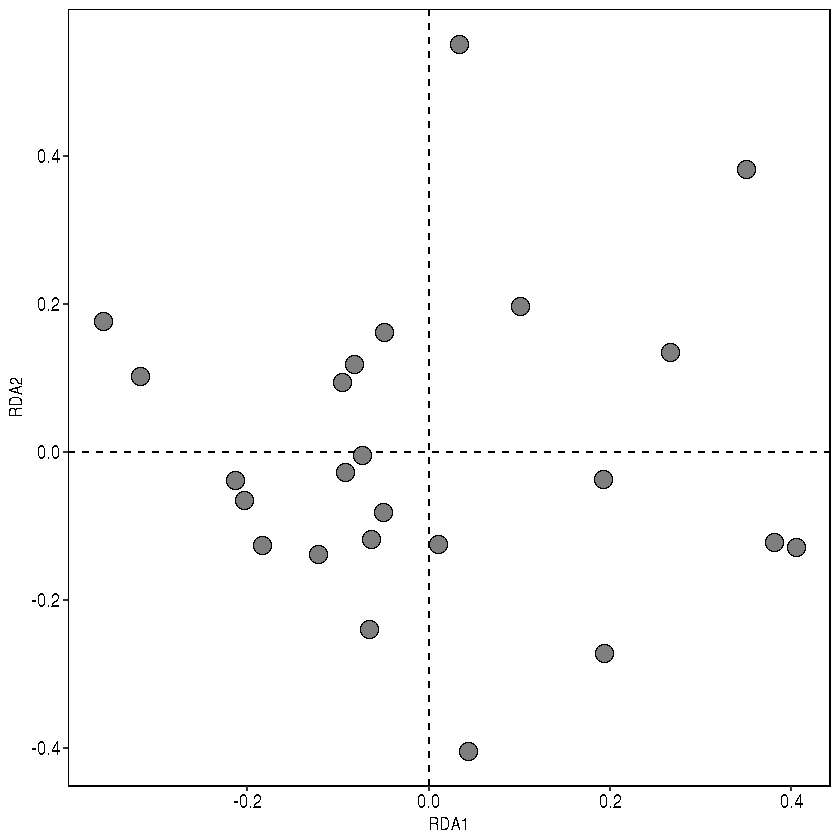

In [10]:
##################################
# PLOTANDO AS UNIDADES AMOSTRAIS #
##################################

ggrda1 <- ggplot() +
  # geom_point(data=rowScores, aes(x=RDA1, y=RDA2),
  #            size=4,
  #            fill = "white",
  #            shape=22) +
  geom_vline(xintercept = 0, alpha=1, linetype = "dashed") +
  geom_hline(yintercept = 0, alpha=1, linetype = "dashed") +
  geom_point(data = rowScores, aes(x = RDA1, y = RDA2),
             size = 5,
             color = "black", fill="grey50", shape=21) +
  theme(panel.background = element_rect(fill = "white", colour = NA),
        panel.grid.minor = element_line(colour = NULL),
        panel.grid.major = element_line(colour = NULL),
        plot.background = element_rect(fill = "white", colour = NA),
        panel.border = element_rect(fill = NA, colour = "black"),
        axis.text.x = element_text(color ="black", size = 12, angle = 0),
        axis.text.y = element_text(color ="black", size = 12, angle = 0))

# http://www.sthda.com/english/wiki/ggplot2-axis-ticks-a-guide-to-customize-tick-marks-and-labels
# http://www.sthda.com/english/wiki/ggplot2-line-types-how-to-change-line-types-of-a-graph-in-r-software

# Visualizar
ggrda1

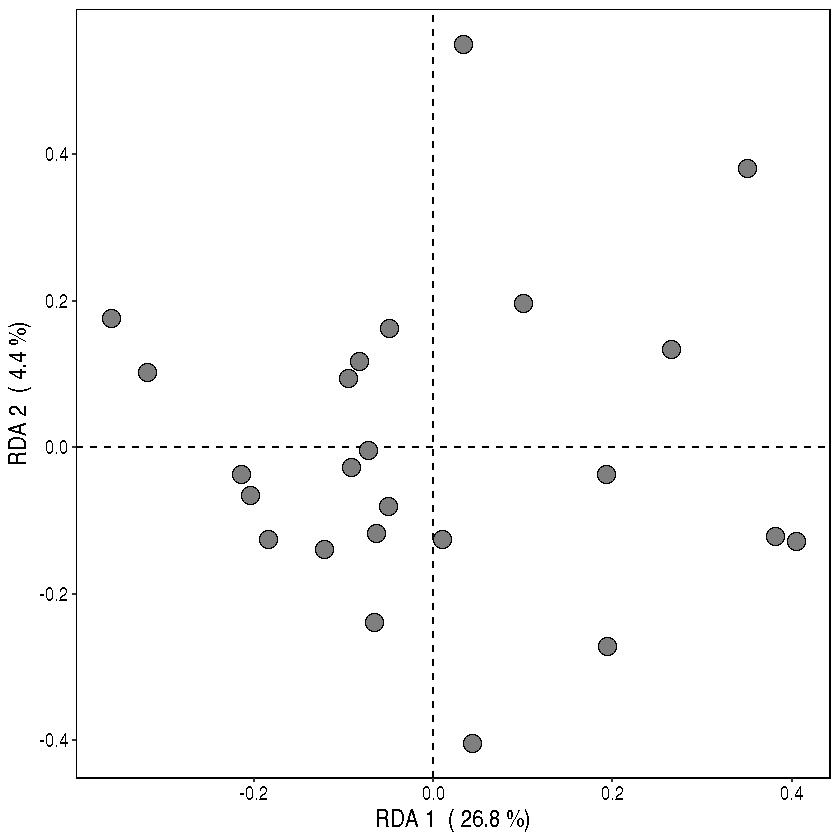

In [11]:
########################################
# DEFININDO EIXOS E LEGENDAS DOS EIXOS #
########################################

ggrda2 <- ggrda1 +
  xlab(paste("RDA 1 ", "(", round(imp.axis.1*100, digits = 1), "%)")) +
  theme(axis.title.x=element_text(angle = 0, size = 15)) + #, face = "bold"
  ylab(paste("RDA 2 ", "(", round(imp.axis.2*100, digits = 1), "%)")) +
  theme(axis.title.y=element_text(angle = 90, size = 15)) #, face = "bold"

# Visualizar
ggrda2

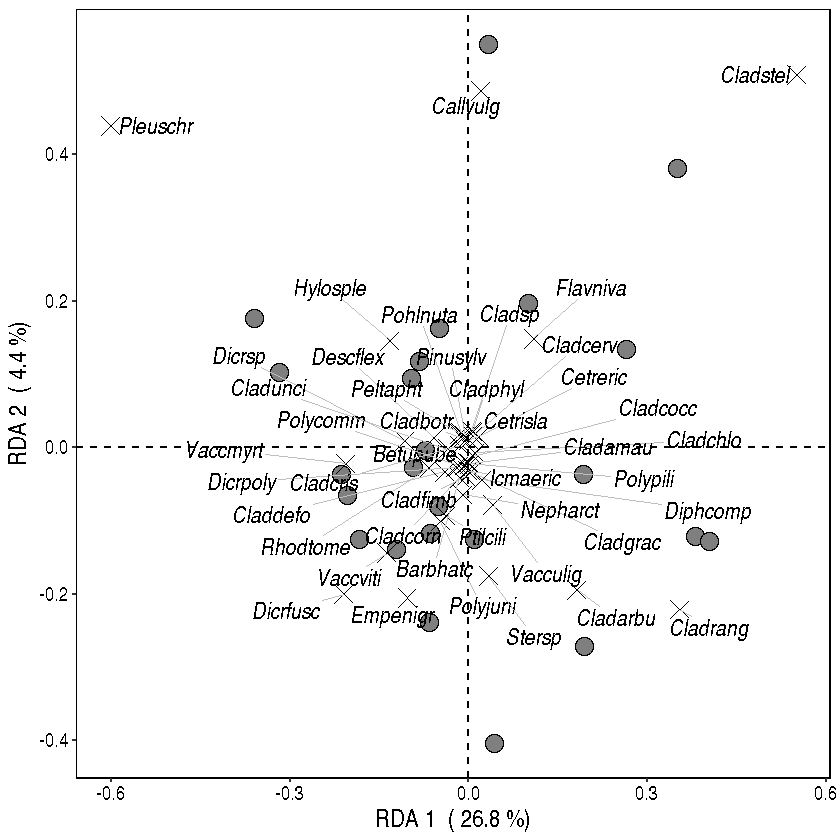

In [13]:
########################
# PLOTANDO AS ESPÉCIES #
########################

# Geralmente as espécies estão sobrepostas. Daí tem uns truques.
# Se as espécies NÂO estiverem sobrepostas, só rode o comando abaixo.
# Se estiverem sobrepostas, bloqueie o comando geom_text e
#libere o geom_point e geom_text_repel.
# Isso vai plotar os pontos das espécies e espalhar os nomes.


ggrda3 <- ggrda2 +
# SE AS ESPÉCIES ESTIVEREM SOBREPOSTAS, BLOQUEIE O COMANDO ABAIXO:
    # geom_text(data=colScores, aes(RDA1, RDA2),
  #           size=4,
  #           label = rownames(colScores),
  #           fontface="italic")
  
# SE AS ESPÉCIES NÃO ESTIVEREM SOBREPOSTAS, BLOQUEIE O COMANDO ABAIXO
  geom_point(data = colScores, aes(RDA1, RDA2),
             size = 5, shape = 4)+
  geom_text_repel(aes(x = colScores$RDA1, y = colScores$RDA2,
                      label = rownames(colScores)),
                  size = 5,
                  fontface ="italic",
                  segment.color = "grey",
                  alpha = 1,
                  segment.size = 0.1,
                  box.padding = unit(0.3, 'lines'))#

# Visualizar
ggrda3

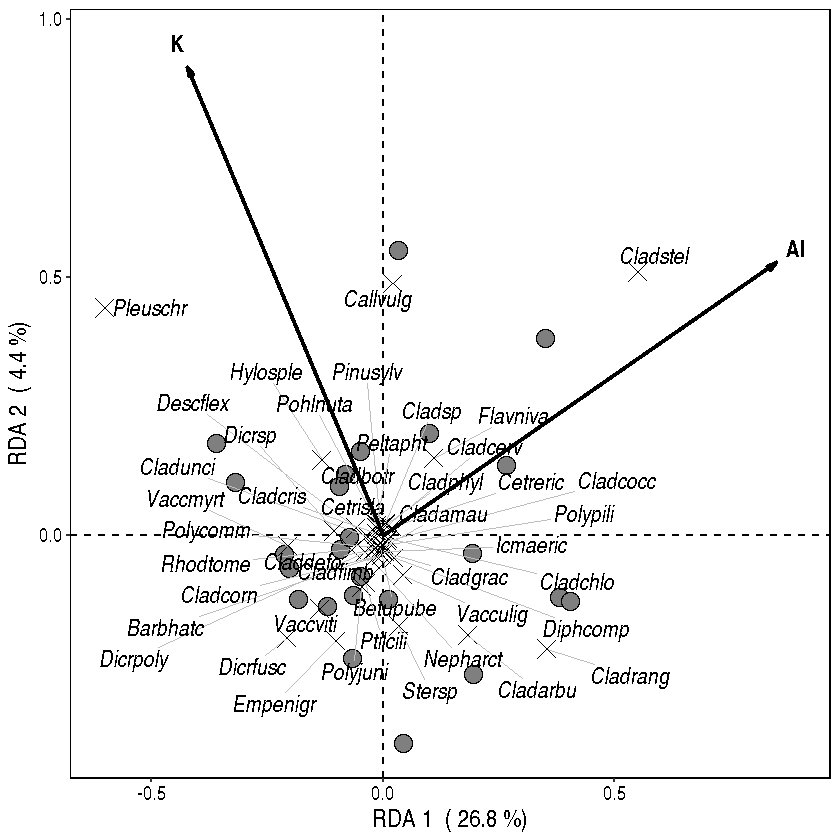

In [15]:
####################################
# PLOTANDO AS VARIÁVEIS AMBIENTAIS #
####################################

ggrda4 <- ggrda3 +
  geom_segment(data = bi.var, aes(x = 0, y = 0, xend = RDA1, yend = RDA2),
               size = 1,
               arrow = arrow(length = unit(0.2, "cm"),
                             type = "closed", angle = 15),
               color = "black",
               alpha = 1) +
  geom_text(data = bi.var, aes(RDA1*1.05, RDA2*1.05,
                               label = rownames(bi.var)),
            color = "black",
            size = 5,
            fontface = "bold")
#geom_text_repel(aes(x = colScores$PC1, y = colScores$PC2, label = rownames(colScores)))

# Visualizar
ggrda4

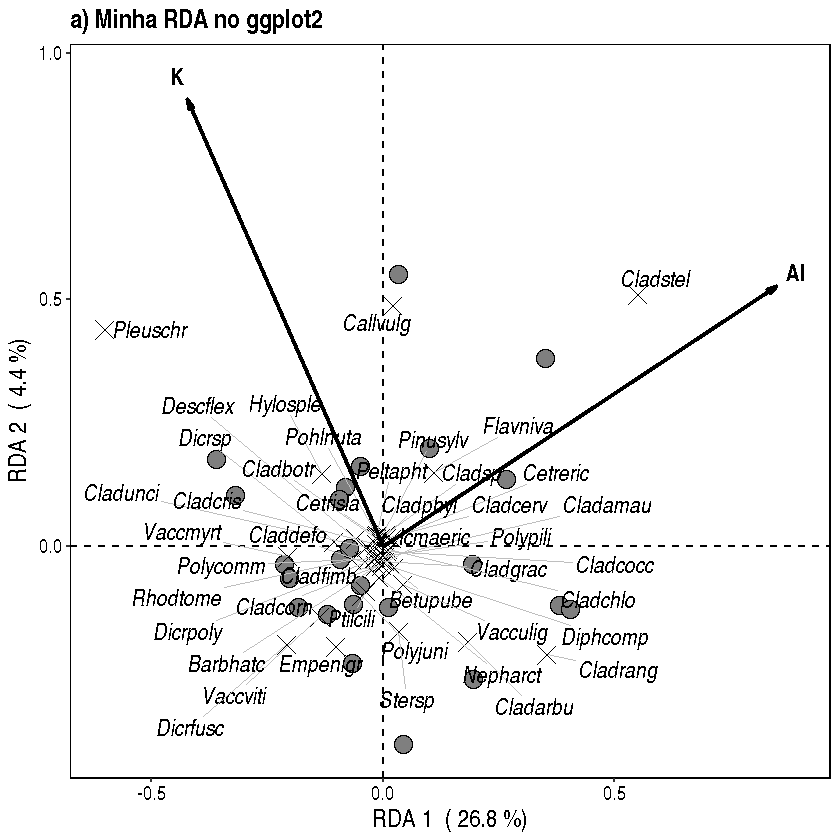

In [16]:
ggrda5 <- ggrda4 + ggtitle("a) Minha RDA no ggplot2") +
  theme(plot.title = element_text(lineheight =.8, face = "bold", size = 16))

ggrda5

# para fechar a figura
# dev.off() 